In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nycflights13 as flights
import platform

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 로드
df_fill = pd.read_csv("./data/df_fill.csv")
df_drop = pd.read_csv("./data/df_drop.csv")

df_fill.head()

,year,month,day,hour,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,tailnum,year_plane,model
0,2013,1,1,5,517.0,515,2.0,830.0,819,-11.0,UA,1545,EWR,IAH,N14228,1999,737-824
1,2013,1,1,5,533.0,529,4.0,850.0,830,-20.0,UA,1714,LGA,IAH,N24211,1998,737-824
2,2013,1,1,5,542.0,540,2.0,923.0,850,-73.0,AA,1141,JFK,MIA,N619AA,1990,757-223
3,2013,1,1,5,544.0,545,-1.0,1004.0,1022,18.0,B6,725,JFK,BQN,N804JB,2012,A320-232
4,2013,1,1,6,554.0,600,-6.0,812.0,837,25.0,DL,461,LGA,ATL,N668DN,1991,757-232


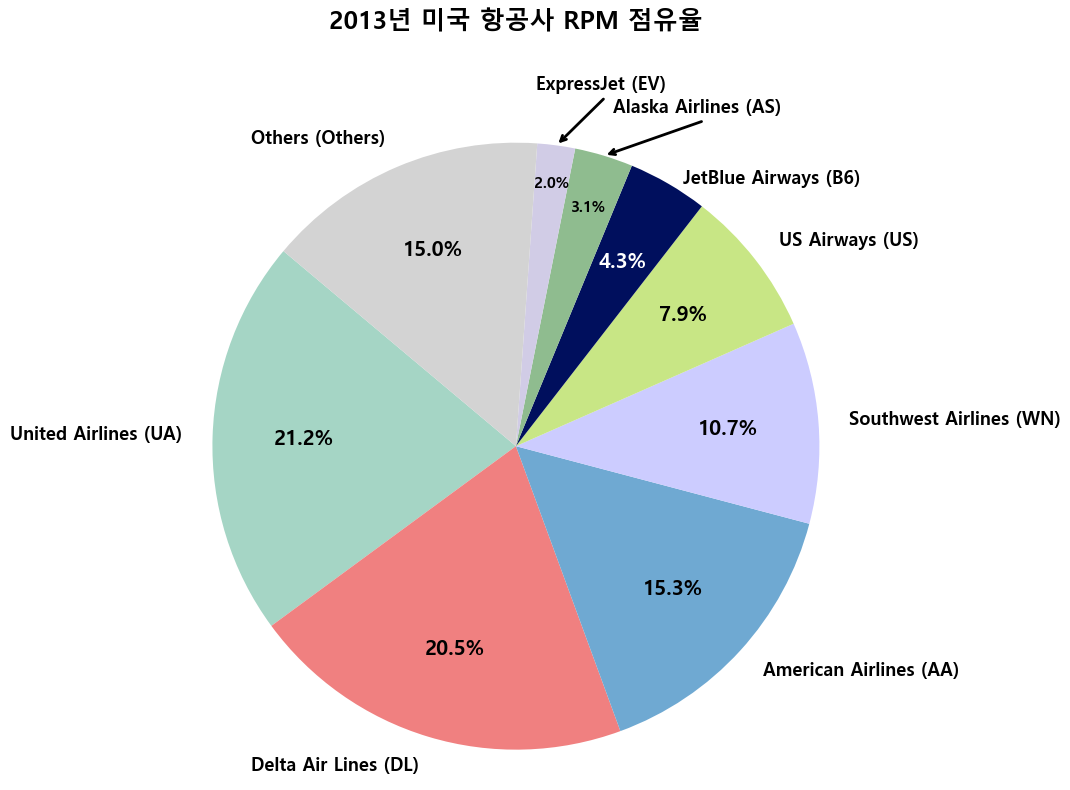

In [ ]:

airlines_display = [
    "United Airlines (UA)",
    "Delta Air Lines (DL)",
    "American Airlines (AA)",   # AA
    "Southwest Airlines (WN)",  # WN 먼저!
    "US Airways (US)",          # US 뒤로!
    "JetBlue Airways (B6)",
    "Alaska Airlines (AS)",
    "ExpressJet (EV)",
    "Others (Others)"
]

rpm_values = [
    21.21,    # UA
    20.52,    # DL
    15.3,     # AA
    10.73,    # WN
    7.9,      # US
    4.26,     # B6
    3.11,     # AS
    2.01,     # EV
    15.02     # Others
]

carrier_codes_display = {
    "United Airlines (UA)": "UA",
    "Delta Air Lines (DL)": "DL",
    "American Airlines (AA)": "AA",
    "Southwest Airlines (WN)": "WN",
    "US Airways (US)": "US",
    "JetBlue Airways (B6)": "B6",
    "Alaska Airlines (AS)": "AS",
    "ExpressJet (EV)": "EV",
    "Others (Others)": "Others"
}

custom_color_map = {
    'UA': '#a5d5c5',
    'DL': '#f08080',
    'AA': '#6fa9d2',
    'US': '#c8e685',
    'B6': '#000f5d',
    'EV': "#d1cce6",
    'WN': '#ccccff',
    'AS': '#8fbc8f',
    'Others': '#d3d3d3'
}

colors_custom = [custom_color_map.get(carrier_codes_display[label], '#d3d3d3') for label in airlines_display]
explode = [0.0 for _ in airlines_display]  # 강조 없음

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    rpm_values,
    labels=airlines_display,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_custom,
    explode=explode,
    textprops={'fontsize': 11}
)

for i, label in enumerate(airlines_display):
    texts[i].set_fontweight('bold')
    texts[i].set_fontsize(13)
    autotexts[i].set_fontweight('bold')
    if "JetBlue" in label:
        autotexts[i].set_color("white")
        x, y = texts[i].get_position()
        texts[i].set_position((x, y - 0.07))
    if "ExpressJet (EV)" == label:
        x, y = texts[i].get_position()
        texts[i].set_position((x - 0.08, y + 0.10))   
    if "Alaska Airlines (AS)" == label:
        x, y = texts[i].get_position()
        texts[i].set_position((x, y + 0.06)) 

# 퍼센트 텍스트 위치 조정
for i, wedge in enumerate(wedges):
    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    r = 0.70
    if airlines_display[i] == "ExpressJet (EV)":
        r = 0.87
    elif airlines_display[i] == "Alaska Airlines (AS)":
        r = 0.82
    x = r * np.cos(angle_rad)
    y = r * np.sin(angle_rad)
    autotexts[i].set_position((x, y))
    if airlines_display[i] not in ["ExpressJet (EV)", "Alaska Airlines (AS)"]:
        autotexts[i].set_fontsize(15)
    else:
        autotexts[i].set_fontsize(11)

def draw_arrow_label_to_wedge_edge_middle(ax, text_obj, wedge, arrow_color='gray', r=1.0, y_offset=-0.04):
    renderer = fig.canvas.get_renderer()
    bbox = text_obj.get_window_extent(renderer=renderer)
    x0_fig = (bbox.x0 + bbox.x1) / 2.03
    y0_fig = (bbox.y0 + bbox.y1) / 2
    inv = ax.transData.inverted()
    x0_data, y0_data = inv.transform((x0_fig, y0_fig))

    arrow_start_x = x0_data
    arrow_start_y = y0_data + y_offset

    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    x_wedge_edge = r * np.cos(angle_rad)
    y_wedge_edge = r * np.sin(angle_rad)

    ax.annotate(
        '', xy=(x_wedge_edge, y_wedge_edge), xytext=(arrow_start_x, arrow_start_y),
        arrowprops=dict(facecolor=arrow_color, arrowstyle='->', lw=2),
        annotation_clip=False
    )

fig.canvas.draw()

ev_idx = airlines_display.index("ExpressJet (EV)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[ev_idx], wedges[ev_idx], r=1.0, y_offset=-0.04)
as_idx = airlines_display.index("Alaska Airlines (AS)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[as_idx], wedges[as_idx], r=1.0, y_offset=-0.04)

plt.title("2013년 미국 항공사 RPM 점유율", fontsize=18, pad=60, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()



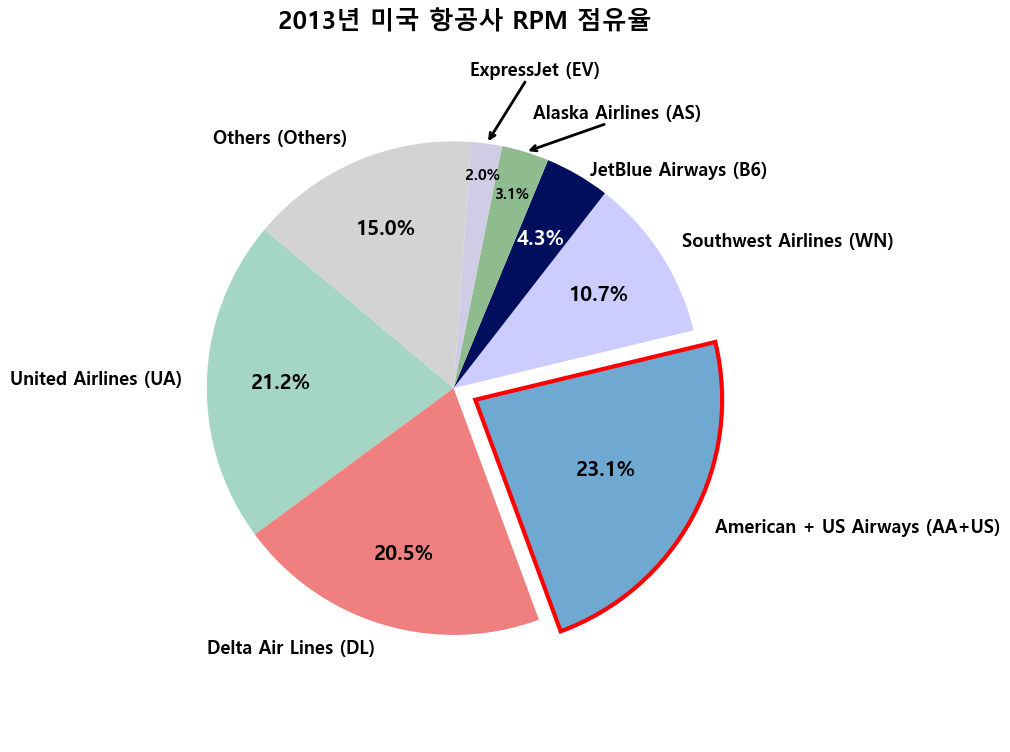

In [ ]:
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

airlines_display = [
    "United Airlines (UA)",
    "Delta Air Lines (DL)",
    "American + US Airways (AA+US)",
    "Southwest Airlines (WN)",
    "JetBlue Airways (B6)",
    "Alaska Airlines (AS)",
    "ExpressJet (EV)",
    "Others (Others)"
]

rpm_values = [
    21.21, 20.52, (15.27 + 7.87), 10.73, 4.26, 3.11, 2.01, 15.02
]


carrier_codes_display = {
    "United Airlines (UA)": "UA",
    "Delta Air Lines (DL)": "DL",
    "American + US Airways (AA+US)": "AA+US",
    "Southwest Airlines (WN)": "WN",
    "JetBlue Airways (B6)": "B6",
    "Alaska Airlines (AS)": "AS",
    "ExpressJet (EV)": "EV",
    "Others (Others)": "Others"
}

custom_color_map = {
    'UA': '#a5d5c5',
    'DL': '#f08080',
    'AA+US': '#6fa9d2',
    'B6': '#000f5d',
    'EV': "#d1cce6",
    'US': '#c8e685',
    'WN': '#ccccff',
    'AS': '#8fbc8f',
    'Others': '#d3d3d3'
}

colors_custom = [custom_color_map.get(carrier_codes_display[label], '#d3d3d3') for label in airlines_display]
explode = [0.0 if "AA+US" not in label else 0.1 for label in airlines_display]

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    rpm_values,
    labels=airlines_display,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_custom,
    explode=explode,
    textprops={'fontsize': 11}
)

for i, label in enumerate(airlines_display):
    texts[i].set_fontweight('bold')
    texts[i].set_fontsize(13)
    autotexts[i].set_fontweight('bold')
    if "JetBlue" in label:
        autotexts[i].set_color("white")
        x, y = texts[i].get_position()
        texts[i].set_position((x, y - 0.07))
    if "AA+US" in label:
        wedges[i].set_edgecolor("red")
        wedges[i].set_linewidth(3)
    if "ExpressJet (EV)" == label:
        x, y = texts[i].get_position()
        texts[i].set_position((x - 0.08, y + 0.20))   
    if "Alaska Airlines (AS)" == label:
        x, y = texts[i].get_position()
        texts[i].set_position((x, y + 0.06)) 

# 모든 퍼센트 위치 기본값
for i, wedge in enumerate(wedges):
    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    # 기본값
    r = 0.70
    # EV/AS만 더 바깥쪽(0.85)으로
    if airlines_display[i] in ["ExpressJet (EV)"]:
        r = 0.87    # 더 바깥: 0.9~0.95까지 가능 (수정 가능)
    elif airlines_display[i] in ["Alaska Airlines (AS)"]:
        r = 0.82
    x = r * np.cos(angle_rad)
    y = r * np.sin(angle_rad)
    autotexts[i].set_position((x, y))
    if airlines_display[i] not in ["ExpressJet (EV)", "Alaska Airlines (AS)"]:
        autotexts[i].set_fontsize(15)
    else:
        autotexts[i].set_fontsize(11)
    

def draw_arrow_label_to_wedge_edge_middle(ax, text_obj, wedge, arrow_color='gray', r=1.0, y_offset=-0.04):
    renderer = fig.canvas.get_renderer()
    bbox = text_obj.get_window_extent(renderer=renderer)
    x0_fig = (bbox.x0 + bbox.x1) / 2.03
    y0_fig = (bbox.y0 + bbox.y1) / 2
    inv = ax.transData.inverted()
    x0_data, y0_data = inv.transform((x0_fig, y0_fig))

    arrow_start_x = x0_data
    arrow_start_y = y0_data + y_offset

    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    x_wedge_edge = r * np.cos(angle_rad)
    y_wedge_edge = r * np.sin(angle_rad)

    ax.annotate(
        '', xy=(x_wedge_edge, y_wedge_edge), xytext=(arrow_start_x, arrow_start_y),
        arrowprops=dict(facecolor=arrow_color, arrowstyle='->', lw=2),
        annotation_clip=False
    )

fig.canvas.draw()

ev_idx = airlines_display.index("ExpressJet (EV)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[ev_idx], wedges[ev_idx], r=1.0, y_offset=-0.04)
as_idx = airlines_display.index("Alaska Airlines (AS)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[as_idx], wedges[as_idx], r=1.0, y_offset=-0.04)

plt.title("2013년 미국 항공사 RPM 점유율", fontsize=18, pad=-5, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()



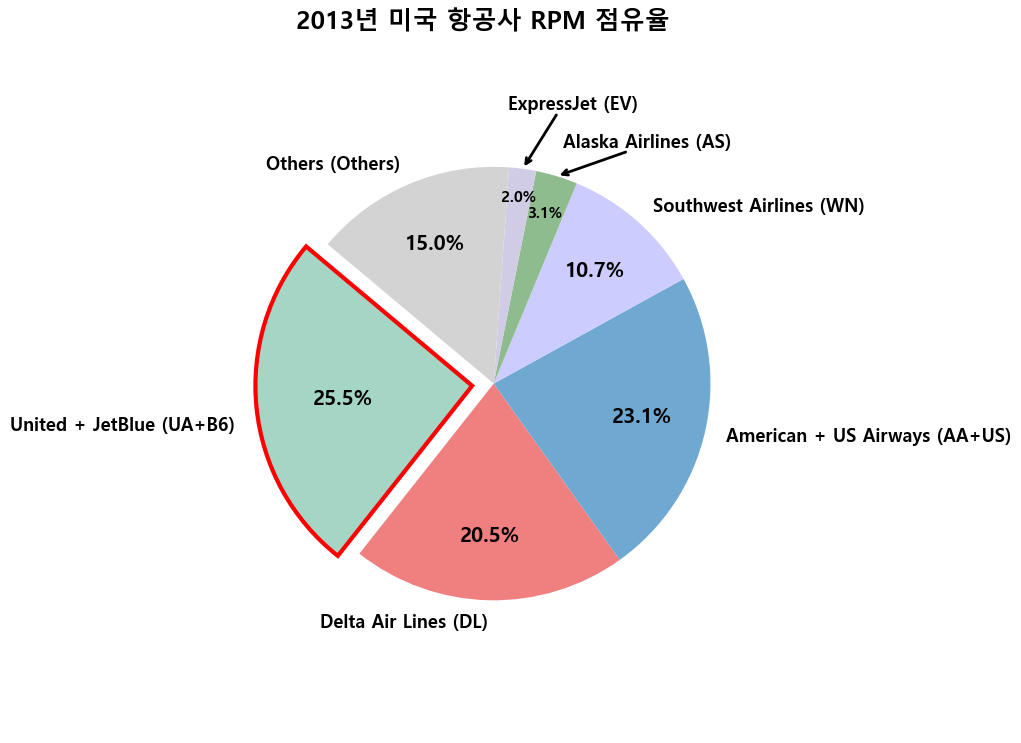

In [ ]:
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

airlines_display = [
    "United + JetBlue (UA+B6)",
    "Delta Air Lines (DL)",
    "American + US Airways (AA+US)",
    "Southwest Airlines (WN)",
    "Alaska Airlines (AS)",
    "ExpressJet (EV)",
    "Others (Others)"
]

rpm_values = [
    (21.21 + 4.26), 20.52, (15.27 + 7.87), 10.73, 3.11, 2.01, 15.02
]

carrier_codes_display = {
    "United + JetBlue (UA+B6)": "UA+B6",
    "Delta Air Lines (DL)": "DL",
    "American + US Airways (AA+US)": "AA+US",
    "Southwest Airlines (WN)": "WN",
    "Alaska Airlines (AS)": "AS",
    "ExpressJet (EV)": "EV",
    "Others (Others)": "Others"
}

custom_color_map = {
    'UA+B6': '#a5d5c5',
    'DL': '#f08080',
    'AA+US': '#6fa9d2',
    'B6': '#000f5d',
    'EV': "#d1cce6",
    'US': '#c8e685',
    'WN': '#ccccff',
    'AS': '#8fbc8f',
    'Others': '#d3d3d3'
}

colors_custom = [custom_color_map.get(carrier_codes_display[label], '#d3d3d3') for label in airlines_display]

# 강조 및 파이 빠져나오는 부분 UA+B6로 바꿈
explode = [0.1 if "United + JetBlue (UA+B6)" == label else 0.0 for label in airlines_display]

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    rpm_values,
    labels=airlines_display,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_custom,
    explode=explode,
    textprops={'fontsize': 11}
)

for i, label in enumerate(airlines_display):
    texts[i].set_fontweight('bold')
    texts[i].set_fontsize(13)
    autotexts[i].set_fontweight('bold')
    # JetBlue 색상 강조는 이미 UA+B6로 합쳐졌으니 별도 처리X
    if "JetBlue" in label:
        autotexts[i].set_color("black")
        x, y = texts[i].get_position()
        texts[i].set_position((x, y - 0.07))
    # 강조 대상 UA+B6로 변경
    if "United + JetBlue (UA+B6)" == label:
        wedges[i].set_edgecolor("red")
        wedges[i].set_linewidth(3)
    if "ExpressJet (EV)" == label:
        x, y = texts[i].get_position()
        texts[i].set_position((x - 0.08, y + 0.20))   
    if "Alaska Airlines (AS)" == label:
        x, y = texts[i].get_position()
        texts[i].set_position((x, y + 0.06)) 

# 퍼센트 텍스트 위치 조정
for i, wedge in enumerate(wedges):
    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    r = 0.70
    if airlines_display[i] == "ExpressJet (EV)":
        r = 0.87
    elif airlines_display[i] == "Alaska Airlines (AS)":
        r = 0.82
    x = r * np.cos(angle_rad)
    y = r * np.sin(angle_rad)
    autotexts[i].set_position((x, y))
    if airlines_display[i] not in ["ExpressJet (EV)", "Alaska Airlines (AS)"]:
        autotexts[i].set_fontsize(15)
    else:
        autotexts[i].set_fontsize(11)

def draw_arrow_label_to_wedge_edge_middle(ax, text_obj, wedge, arrow_color='gray', r=1.0, y_offset=-0.04):
    renderer = fig.canvas.get_renderer()
    bbox = text_obj.get_window_extent(renderer=renderer)
    x0_fig = (bbox.x0 + bbox.x1) / 2.03
    y0_fig = (bbox.y0 + bbox.y1) / 2
    inv = ax.transData.inverted()
    x0_data, y0_data = inv.transform((x0_fig, y0_fig))

    arrow_start_x = x0_data
    arrow_start_y = y0_data + y_offset

    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    x_wedge_edge = r * np.cos(angle_rad)
    y_wedge_edge = r * np.sin(angle_rad)

    ax.annotate(
        '', xy=(x_wedge_edge, y_wedge_edge), xytext=(arrow_start_x, arrow_start_y),
        arrowprops=dict(facecolor=arrow_color, arrowstyle='->', lw=2),
        annotation_clip=False
    )

fig.canvas.draw()

ev_idx = airlines_display.index("ExpressJet (EV)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[ev_idx], wedges[ev_idx], r=1.0, y_offset=-0.04)
as_idx = airlines_display.index("Alaska Airlines (AS)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[as_idx], wedges[as_idx], r=1.0, y_offset=-0.04)

plt.title("2013년 미국 항공사 RPM 점유율", 
          fontsize=18, pad=-5, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

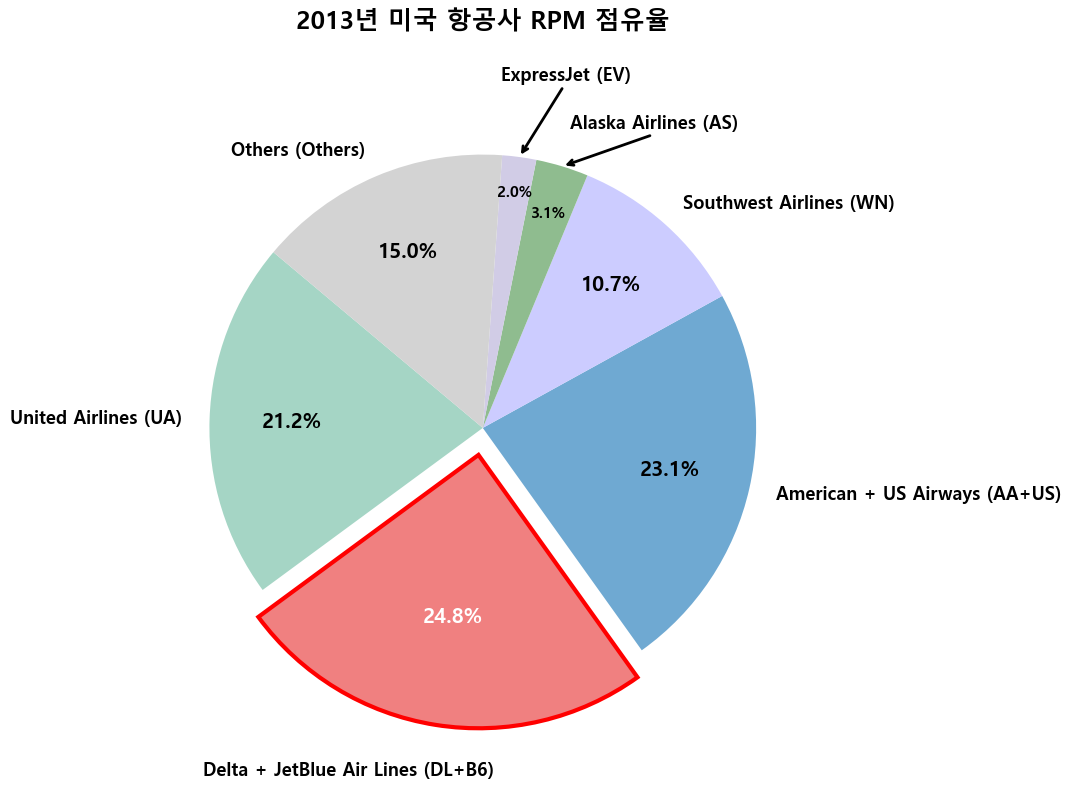

In [38]:
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

airlines_display = [
    "United Airlines (UA)",
    "Delta + JetBlue Air Lines (DL+B6)",
    "American + US Airways (AA+US)",
    "Southwest Airlines (WN)",
    "Alaska Airlines (AS)",
    "ExpressJet (EV)",
    "Others (Others)"
]

rpm_values = [
    21.21, (20.52 + 4.26), (15.27 + 7.87), 10.73, 3.11, 2.01, 15.02
]

carrier_codes_display = {
    "United Airlines (UA)": "UA",
    "Delta + JetBlue Air Lines (DL+B6)": "DL+B6",
    "American + US Airways (AA+US)": "AA+US",
    "Southwest Airlines (WN)": "WN",
    "Alaska Airlines (AS)": "AS",
    "ExpressJet (EV)": "EV",
    "Others (Others)": "Others"
}

custom_color_map = {
    'UA': '#a5d5c5',
    'DL+B6': '#f08080',  # 델타+젯블루 강조 컬러(델타 기준)
    'AA+US': '#6fa9d2',
    'B6': '#000f5d',
    'EV': "#d1cce6",
    'US': '#c8e685',
    'WN': '#ccccff',
    'AS': '#8fbc8f',
    'Others': '#d3d3d3'
}

colors_custom = [custom_color_map.get(carrier_codes_display[label], '#d3d3d3') for label in airlines_display]

# DL+B6 강조, explode 설정
explode = [0.1 if label == "Delta + JetBlue Air Lines (DL+B6)" else 0.0 for label in airlines_display]

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    rpm_values,
    labels=airlines_display,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_custom,
    explode=explode,
    textprops={'fontsize': 11}
)

for i, label in enumerate(airlines_display):
    texts[i].set_fontweight('bold')
    texts[i].set_fontsize(13)
    autotexts[i].set_fontweight('bold')
    if "JetBlue" in label:
        autotexts[i].set_color("white")
        x, y = texts[i].get_position()
        texts[i].set_position((x, y - 0.07))
    # DL+B6만 강조(테두리, 두께)
    if label == "Delta + JetBlue Air Lines (DL+B6)":
        wedges[i].set_edgecolor("red")
        wedges[i].set_linewidth(3)
        x, y = texts[i].get_position()
        texts[i].set_position((x + 0.23, y))
    if label == "ExpressJet (EV)":
        x, y = texts[i].get_position()
        texts[i].set_position((x - 0.08, y + 0.20))
    if label == "Alaska Airlines (AS)":
        x, y = texts[i].get_position()
        texts[i].set_position((x, y + 0.06))

for i, wedge in enumerate(wedges):
    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    r = 0.70
    if airlines_display[i] == "ExpressJet (EV)":
        r = 0.87
    elif airlines_display[i] == "Alaska Airlines (AS)":
        r = 0.82
    x = r * np.cos(angle_rad)
    y = r * np.sin(angle_rad)
    autotexts[i].set_position((x, y))
    if airlines_display[i] not in ["ExpressJet (EV)", "Alaska Airlines (AS)"]:
        autotexts[i].set_fontsize(15)
    else:
        autotexts[i].set_fontsize(11)

def draw_arrow_label_to_wedge_edge_middle(ax, text_obj, wedge, arrow_color='gray', r=1.0, y_offset=-0.04):
    renderer = fig.canvas.get_renderer()
    bbox = text_obj.get_window_extent(renderer=renderer)
    x0_fig = (bbox.x0 + bbox.x1) / 2.03
    y0_fig = (bbox.y0 + bbox.y1) / 2
    inv = ax.transData.inverted()
    x0_data, y0_data = inv.transform((x0_fig, y0_fig))

    arrow_start_x = x0_data
    arrow_start_y = y0_data + y_offset

    theta = (wedge.theta1 + wedge.theta2) / 2
    angle_rad = np.deg2rad(theta)
    x_wedge_edge = r * np.cos(angle_rad)
    y_wedge_edge = r * np.sin(angle_rad)

    ax.annotate(
        '', xy=(x_wedge_edge, y_wedge_edge), xytext=(arrow_start_x, arrow_start_y),
        arrowprops=dict(facecolor=arrow_color, arrowstyle='->', lw=2),
        annotation_clip=False
    )

fig.canvas.draw()

ev_idx = airlines_display.index("ExpressJet (EV)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[ev_idx], wedges[ev_idx], r=1.0, y_offset=-0.04)
as_idx = airlines_display.index("Alaska Airlines (AS)")
draw_arrow_label_to_wedge_edge_middle(ax, texts[as_idx], wedges[as_idx], r=1.0, y_offset=-0.04)

plt.title("2013년 미국 항공사 RPM 점유율", fontsize=18, pad=70, fontweight='bold')

plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
# # ✅ 한글 폰트 설정
# if platform.system() == 'Windows':
#     plt.rcParams['font.family'] = 'Malgun Gothic'
# else:
#     plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False

# ✅ 데이터 로드
df = pd.read_csv("./data/df_fill.csv")

# 🎯 1. 전체 항공사 점유율 분석 (JetBlue 색상 + 퍼센트 강조)

carrier_counts = df['carrier'].value_counts()
top8_carriers = carrier_counts.head(8)
others_count = carrier_counts.iloc[8:].sum()

plot_labels = list(top8_carriers.index) + ['Others']
plot_data = list(top8_carriers.values) + [others_count]

# ✅ JetBlue 전용 색상 (#000f5d) 적용
jetblue_color = '#000f5d'
default_colors = plt.cm.Set3(range(len(plot_labels)))
colors = [jetblue_color if label == 'B6' else default for label, default in zip(plot_labels, default_colors)]

explode = [0.1 if label == 'B6' else 0 for label in plot_labels]

# ✅ 시각화
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(plot_data,
                                  labels=plot_labels,
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  explode=explode,
                                  startangle=90,
                                  textprops={'fontsize': 18, 'fontweight': 'bold'})

# 👉 JetBlue 퍼센트 텍스트만 흰색으로 변경
for label, autotext in zip(plot_labels, autotexts):
    autotext.set_color('white' if label == 'B6' else 'black')

# 라벨 텍스트 꾸미기
for text in texts:
    text.set_fontsize(20)
    text.set_fontweight('bold')

# 테두리 설정
for wedge, label in zip(wedges, plot_labels):
    wedge.set_linewidth(4 if label == 'B6' else 0.5)
    wedge.set_edgecolor('red' if label == 'B6' else 'white')

plt.title('① 뉴욕 공항의 항공사별 점유율', fontsize=20, fontweight='bold')

# 범례 생성
legend_labels = [f'{label}(JetBlue): {count:,}편' if label == 'B6' else f'{label}: {count:,}편'
                 for label, count in zip(plot_labels, plot_data)]

plt.legend(wedges, legend_labels,
           title="항공편 수", title_fontsize=16,
           fontsize=14, loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


##############################################################################################

# 필요한 데이터 재정의
b6_flights = df[df['carrier'] == 'B6']
b6_origin_counts = b6_flights['origin'].value_counts()

jfk_count = b6_origin_counts.get('JFK', 0)
other_airports_count = len(b6_flights) - jfk_count
b6_route_data = [jfk_count, other_airports_count]
b6_route_labels = ['JFK', 'Other Airports']
b6_route_colors = ['#000f5d', 'lightgray']
b6_route_explode = [0.1, 0]

# 파이차트 생성
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(b6_route_data,
                                  labels=b6_route_labels,
                                  autopct='%1.1f%%',
                                  colors=b6_route_colors,
                                  explode=b6_route_explode,
                                  startangle=90,
                                  textprops={'fontsize': 18, 'fontweight': 'bold'})

# 라벨 텍스트 폰트 설정
for text in texts:
    text.set_fontsize(20)
    text.set_fontweight('bold')

# 퍼센트 텍스트: JFK만 흰색으로
for label, autotext in zip(b6_route_labels, autotexts):
    if label == 'JFK':
        autotext.set_color('white')
    autotext.set_fontsize(18)
    autotext.set_fontweight('bold')

# 웨지 테두리 설정
for wedge, label in zip(wedges, b6_route_labels):
    if label == 'JFK':
        wedge.set_linewidth(4)
        wedge.set_edgecolor('red')
    else:
        wedge.set_linewidth(0.5)
        wedge.set_edgecolor('white')

# 제목 및 범례
plt.title('② JetBlue(B6) 내 JFK 출발노선 비중', fontsize=18, fontweight='bold')

b6_route_legend_labels = [
    f'JFK: {jfk_count:,}편' if label == 'JFK' else f'{label}: {count:,}편'
    for label, count in zip(b6_route_labels, b6_route_data)
]

plt.legend(wedges, b6_route_legend_labels,
           title="JetBlue 출발공항별 항공편 수",
           title_fontsize=16,
           fontsize=14,
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


####################################################################################################3


# ✅ JFK 출발 항공편 필터링
jfk_flights = df[df['origin'] == 'JFK']
carrier_counts = jfk_flights['carrier'].value_counts()

# ✅ 상위 6개 항공사만 개별 표시
top6_labels = carrier_counts.head(6).index.tolist()
top6_values = carrier_counts.head(6).values.tolist()

# ✅ Others 항공편 수 계산
others_value = carrier_counts.iloc[6:].sum()

# ✅ 최종 데이터 정의
jfk_labels = top6_labels + ['Others']
jfk_data = top6_values + [others_value]
jfk_explode = [0.1 if label == 'B6' else 0 for label in jfk_labels]

# ✅ 색상 정의 (상위 6개 + Others)
refined_carrier_color_map = {
    'B6': '#000f5d',
    'DL': '#f08080',
    '9E': '#fbb4d8',
    'AA': '#6fa9d2',
    'MQ': '#ffcc66',
    'UA': '#a5d5c5',
    'Others': '#d3d3d3'
}
jfk_colors_refined = [refined_carrier_color_map.get(label, 'gray') for label in jfk_labels]

# ✅ 파이차트 시각화
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    jfk_data,
    labels=jfk_labels,
    autopct='%1.1f%%',
    colors=jfk_colors_refined,
    explode=jfk_explode,
    startangle=90,
    textprops={'fontsize': 18, 'fontweight': 'bold'}
)

# ✅ 텍스트 스타일
for text in texts:
    text.set_fontsize(20)
    text.set_fontweight('bold')

for label, autotext in zip(jfk_labels, autotexts):
    autotext.set_color('white' if label == 'B6' else 'black')

for wedge, label in zip(wedges, jfk_labels):
    wedge.set_linewidth(4 if label == 'B6' else 0.5)
    wedge.set_edgecolor('red' if label == 'B6' else 'white')

# ✅ 범례 정의
legend_labels = [
    f'{label}(JetBlue): {count:,}편' if label == 'B6' else f'{label}: {count:,}편'
    for label, count in zip(jfk_labels, jfk_data)
]

plt.legend(wedges, legend_labels,
           title="JFK 출발 항공편 수",
           title_fontsize=16,
           fontsize=14,
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('③ JFK 공항의 항공사별 점유율 (Top 6 + Others)', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

###################################################################################################

# 코드 실행 환경 초기화로 인해 필요한 라이브러리와 데이터를 다시 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다시 로드
df = pd.read_csv("./data/df_fill.csv")

# JetBlue(B6) 항공편 필터링
b6_flights = df[df['carrier'] == 'B6']

# 노선(route) 생성: origin → dest
b6_flights['route'] = b6_flights['origin'] + " → " + b6_flights['dest']

# Top 10 노선 추출
top10_routes = b6_flights['route'].value_counts().head(10).reset_index()
top10_routes.columns = ['route', 'flight_count']

# CSV로 저장
output_path = "./data/jetblue_top10_routes.csv"
top10_routes.to_csv(output_path, index=False)

output_path

################################################################################

# 데이터 다시 불러오기
df_top_10 = pd.read_csv("./data/jetblue_top10_routes.csv")

## 한글 폰트 설정
platform.system() == 'Windows'
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 색상 설정: JFK에서 출발하는 경우 지정된 파란색, 나머지는 회색
highlight_color = "#000f5d"
bar_colors = [highlight_color if route.startswith("JFK") else "lightgray" for route in df_top_10["route"]]


# 막대그래프 시각화
plt.figure(figsize=(12, 6))
bars = plt.barh(df_top_10["route"], df_top_10["flight_count"], color=bar_colors)

plt.xlabel("운항 횟수")
plt.ylabel("노선")
plt.title("JetBlue 항공 Top 10 노선 (운항 횟수 기준)")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)

# 막대 옆에 수치 표기
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

: 